In [2]:
import sys
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
import pickle
from keras.regularizers import l2
from  scipy import ndimage

#### Dataset


Load dataset + One-hot encoding + Normalization

In [3]:
def load_dataset():
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    # One-hot encoding
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    # Normalize to [0,1]
    trainX = trainX.astype('float32') / 255.0
    testX = testX.astype('float32') / 255.0

    return trainX, trainY, testX, testY

#### Model

Imortant functions

In [4]:
def train(model, trainX, trainY, testX, testY):
	generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

	train_data = generator.flow(trainX, trainY, batch_size=64)

	results = model.fit(train_data, epochs=400, validation_data=(testX, testY), verbose=1)

	return results

def evaluate(model, testX, testY):
    _, acc = model.evaluate(testX, testY, verbose=0)

    print(f"The model achieved a final accuracy of {acc*100:.2f}%")

def plot_results(history):
	plt.title('Cross Entropy Loss')
	plt.plot(history['loss'], color='blue', label='Training loss')
	plt.plot(history['val_loss'], color='orange', label='Validation/test loss')
	plt.legend()
	plt.show()

	plt.title('Classification Accuracy')
	plt.plot(history['accuracy'], color='blue', label='Training accuracy')
	plt.plot(history['val_accuracy'], color='orange', label='Validation/test accuracy')
	plt.legend()
	plt.show()

In [5]:
def save_model(filename, model):
    filename = '' + filename
    pickle.dump(model, open(filename, 'wb'))

def save_history(filename, history):
    filename = '' + filename
    pickle.dump(history, open(filename, 'wb'))

def load_model(filename):
    filename = '' + filename
    model = pickle.load(open(filename, 'rb'))
    return model

def load_history(filename):
    filename = '' + filename
    history = pickle.load(open(filename, 'rb'))
    return history

Baseline model

In [6]:
def dropout_model():
    # Create architecture
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2))) 
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    # Optimization method
    opt = SGD(learning_rate=0.001, momentum=0.9)

    # Compile model and choose loss type
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [7]:
trainX, trainY, testX, testY = load_dataset()

170498071/170498071 [==============================] - 7s 0us/step


In [8]:
model = dropout_model()
results = train(model, trainX, trainY, testX, testY)

2024-05-14 12:10:01.282350: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2348] TensorFlow was not built with CUDA kernel binaries compatible with compute capability 9.0. CUDA kernels will be jit-compiled from PTX, which could take 30 minutes or longer.
2024-05-14 12:10:01.299092: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2348] TensorFlow was not built with CUDA kernel binaries compatible with compute capability 9.0. CUDA kernels will be jit-compiled from PTX, which could take 30 minutes or longer.
2024-05-14 12:10:01.472796: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2354 MB memory:  -> device: 0, name: NVIDIA H100 80GB HBM3 MIG 1g.10gb, pci bus id: 0000:d1:00.0, compute capability: 9.0


Epoch 1/400


2024-05-14 12:10:03.309427: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-05-14 12:10:12.200544: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-05-14 12:10:12.288095: W external/local_xla/xla/stream_executor/gpu/asm_compiler.cc:225] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 9.0
2024-05-14 12:10:12.288120: W external/local_xla/xla/stream_executor/gpu/asm_compiler.cc:228] Used ptxas at ptxas
2024-05-14 12:10:12.288172: W external/local_xla/xla/stream_executor/gpu/redzone_allocator.cc:322] UNIMPLEMENTED: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2024-05-14 12:10:12.6524

782/782 [==============================] - 53s 24ms/step - loss: 2.1245 - accuracy: 0.2987 - val_loss: 1.5354 - val_accuracy: 0.4433
Epoch 2/400
782/782 [==============================] - 16s 21ms/step - loss: 1.6249 - accuracy: 0.4011 - val_loss: 1.4212 - val_accuracy: 0.4758
Epoch 3/400
782/782 [==============================] - 16s 20ms/step - loss: 1.5267 - accuracy: 0.4386 - val_loss: 1.3626 - val_accuracy: 0.4992
Epoch 4/400
782/782 [==============================] - 16s 20ms/step - loss: 1.4448 - accuracy: 0.4712 - val_loss: 1.3737 - val_accuracy: 0.4849
Epoch 5/400
782/782 [==============================] - 16s 20ms/step - loss: 1.3932 - accuracy: 0.4964 - val_loss: 1.4179 - val_accuracy: 0.4788
Epoch 6/400
782/782 [==============================] - 16s 20ms/step - loss: 1.3332 - accuracy: 0.5181 - val_loss: 1.4627 - val_accuracy: 0.4712
Epoch 7/400
782/782 [==============================] - 16s 20ms/step - loss: 1.2826 - accuracy: 0.5353 - val_loss: 1.3936 - val_accuracy: 0.49

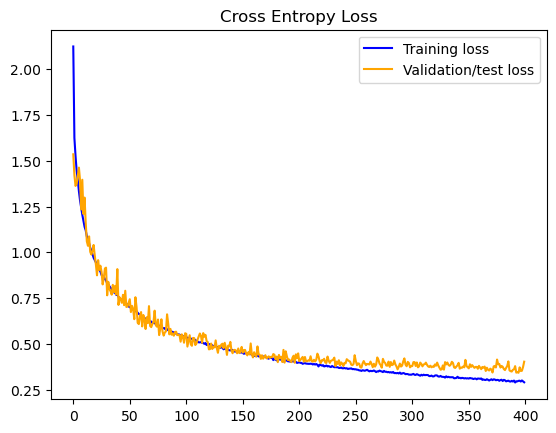

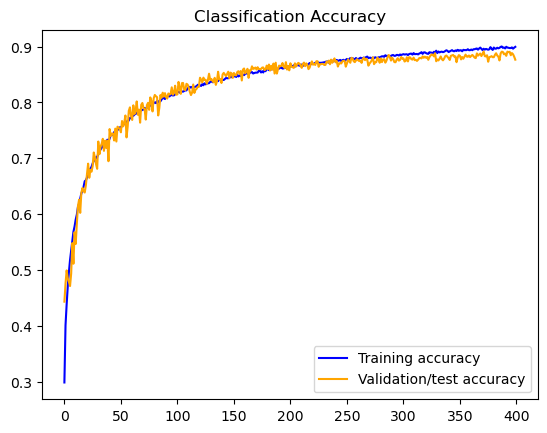

The model achieved a final accuracy of 87.64%


In [9]:
plot_results(results.history)
evaluate(model, testX, testY)

In [10]:
save_model('dropout_augment_batch_model', model)
save_history('dropout_augment_batch_model_history', results.history)

In [11]:
# from google.colab import files
# files.download('content/models/dropout_augment_model')
# files.download('content/history/dropout_augment_model')

In [12]:
# test = load_model('dropout_augment_model')
# history_test = load_history('dropout_augment_model')

In [13]:
# plot_results(history_test)
# evaluate(test, testX, testY)